#  Telco Customer Churn Analysis

Customer churn is one of the most critical issues faced by telecom companies. Retaining existing customers is significantly more cost-effective than acquiring new ones, and understanding why customers leave can lead to strategic improvements in service, pricing, and customer experience.

This notebook explores the **Telco Customer Churn** dataset from Kaggle. Our goal is to:

- Understand the key drivers behind customer churn using exploratory data analysis (EDA)
- Engineer meaningful features for prediction
- Train and evaluate a variety of classification models
- Use performance metrics to compare models
- Tune the best model for improved performance
- Interpret results and draw actionable insights

By the end of this analysis, we aim to answer the question:  
💡 *"Which factors most influence customer churn, and how well can we predict it?"*


In [1]:
import kagglehub
from kagglehub import KaggleDatasetAdapter

df = kagglehub.load_dataset(
    KaggleDatasetAdapter.PANDAS,
    "blastchar/telco-customer-churn",
    "WA_Fn-UseC_-Telco-Customer-Churn.csv"
)

print(df.head())


/var/folders/q9/tb1kvndx3k7f073w2bk30z9r0000gn/T/ipykernel_10696/3735561668.py:4: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  df = kagglehub.load_dataset(


   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

In [2]:
#pip install scikit-learn

In [3]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import joblib



In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

#

#TotalCharges  is numerical dat, However it is stored as an object  we need to rectify this by converting it.

In [7]:
#TotalCharges object to float 
df ['TotalCharges']= pd.to_numeric(df['TotalCharges'],errors= 'coerce')

In [8]:
df.dtypes['TotalCharges']

dtype('float64')

In [9]:
df.shape

(7043, 21)

In [10]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [11]:
## check for missing values 
df.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [12]:
missing_values= df[df['TotalCharges'].isnull()]
missing_values

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [13]:

missing_values[['customerID', 'tenure', 'MonthlyCharges', 'TotalCharges']]


,customerID,tenure,MonthlyCharges,TotalCharges
488,4472-LVYGI,0,52.55,NaN
753,3115-CZMZD,0,20.25,NaN
936,5709-LVOEQ,0,80.85,NaN
1082,4367-NUYAO,0,25.75,NaN
1340,1371-DWPAZ,0,56.05,NaN
3331,7644-OMVMY,0,19.85,NaN
3826,3213-VVOLG,0,25.35,NaN
4380,2520-SGTTA,0,20.00,NaN
5218,2923-ARZLG,0,19.70,NaN
6670,4075-WKNIU,0,73.35,NaN



#The reason for these missing values is that they joined recently, tenure ==0. Hence they have a Monthlycharges but no TotalCharges 

The logical solution to fix the missing value is to fill them with zero


In [14]:
df['TotalCharges']= df['TotalCharges'].fillna(0)

df['TotalCharges'].isnull().sum()

0

In [15]:
for col in df.select_dtypes(include='object').columns:

    print (f"---{col}---")
    print(df[col].unique())
    print()

---customerID---
['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']

---gender---
['Female' 'Male']

---Partner---
['Yes' 'No']

---Dependents---
['No' 'Yes']

---PhoneService---
['No' 'Yes']

---MultipleLines---
['No phone service' 'No' 'Yes']

---InternetService---
['DSL' 'Fiber optic' 'No']

---OnlineSecurity---
['No' 'Yes' 'No internet service']

---OnlineBackup---
['Yes' 'No' 'No internet service']

---DeviceProtection---
['No' 'Yes' 'No internet service']

---TechSupport---
['No' 'Yes' 'No internet service']

---StreamingTV---
['No' 'Yes' 'No internet service']

---StreamingMovies---
['No' 'Yes' 'No internet service']

---Contract---
['Month-to-month' 'One year' 'Two year']

---PaperlessBilling---
['Yes' 'No']

---PaymentMethod---
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']

---Churn---
['No' 'Yes']



# Senior citizen should be  an object

In [16]:
df['SeniorCitizen'] =df['SeniorCitizen'].astype('object')

In [17]:
df['SeniorCitizen']

0       0
1       0
2       0
3       0
4       0
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: SeniorCitizen, Length: 7043, dtype: object

## Exploratory Data Analysis  --- Categorical data 

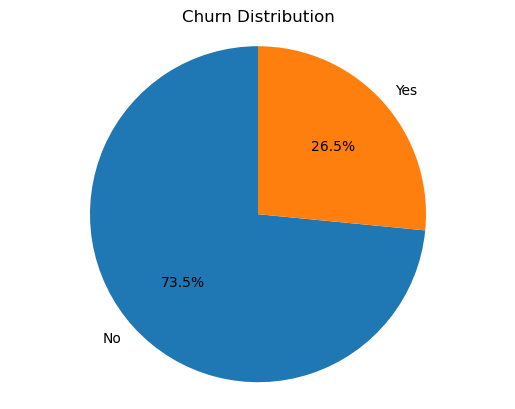

In [18]:
churn_counts = df['Churn'].value_counts()
plt.pie(churn_counts, labels=churn_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Churn Distribution')
plt.axis('equal')
plt.show()


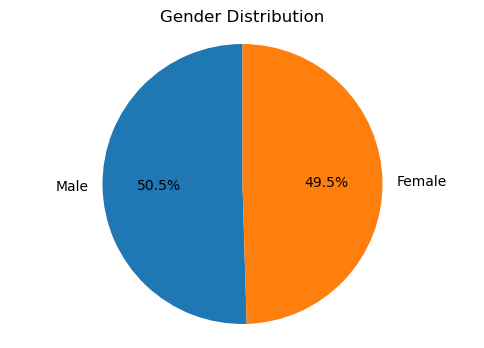

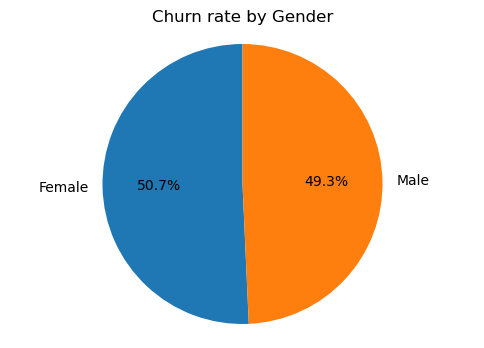

In [19]:
## gender distribution and churn base on gender 

#count gender 
gender_count= df['gender'].value_counts()
gender_count

plt.figure(figsize=(6,4))
plt.pie(
    gender_count,
    labels=gender_count.index,
    autopct='%1.1f%%',
    startangle=90
    
)
plt.title('Gender Distribution')
plt.axis('equal')
plt.show()

churn_rate_by_gender= df.groupby('gender')['Churn'].apply(lambda x:(x=="Yes").mean())

plt.figure(figsize=(6,4))
plt.pie(
    churn_rate_by_gender,
    labels= churn_rate_by_gender.index,
    autopct='%1.1f%%',
    startangle=90
)

plt.title('Churn rate by Gender')
plt.axis('equal')
plt.show()


# Gender and churn rate by gender seems to be almost equal with female churn slighly more than male.

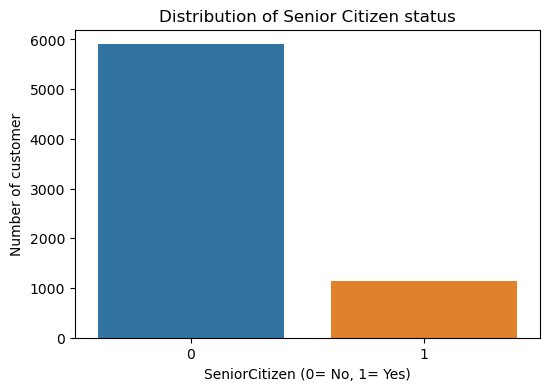

<function matplotlib.pyplot.show(close=None, block=None)>

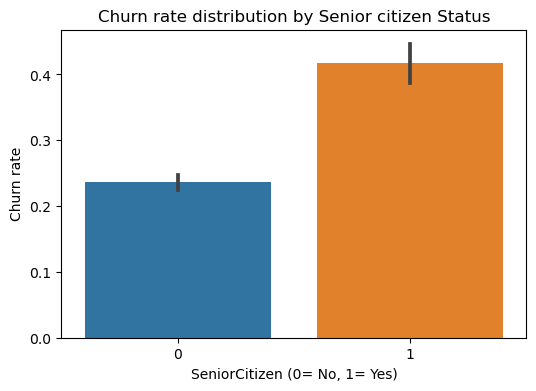

In [20]:
# churn by senior citizen 

## Senior citizen status 

plt.figure(figsize=(6,4))
sns.countplot(x = "SeniorCitizen", data= df)
plt.title("Distribution of Senior Citizen status")
plt.xlabel('SeniorCitizen (0= No, 1= Yes)')
plt.ylabel("Number of customer")
plt.show()


## churn by senior citizen  status 

plt.figure(figsize=(6,4))
sns.barplot(x='SeniorCitizen',
    y=df['Churn'].map({"Yes":1, 'No':0}),
    data =df
    
)


plt.title("Churn rate distribution by Senior citizen Status")
plt.xlabel('SeniorCitizen (0= No, 1= Yes)')
plt.ylabel('Churn rate')
plt.show

## EDA continued 

In [21]:
# Selecting categorical data only exclude customerID, gender,SeniorCitizen 
Categorical_cols = df.select_dtypes(include="object").columns.tolist()
excluded_cols= ('customerID','gender','SeniorCitizen','Churn')  ## exclude this to do the analysis for all the categorical data - since we already that 
Categorical_cols= [col for col in Categorical_cols if col  not in excluded_cols]
Categorical_cols

['Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

In [22]:


def plot_uni_bi_categorical(df, cols, target='Churn'):
    df = df.copy()
    df['Churn_encoded'] = df[target].map({'Yes': 1, 'No': 0})
    total = len(df)

    for col in cols:
        # --- Univariate Plot ---
        plt.figure(figsize=(6, 3))
        order = df[col].value_counts().index
        ax = sns.countplot(data=df, x=col, order=order)
        plt.title(f'Univariate Analysis: {col}')
        plt.ylabel('Count')
        plt.xticks(rotation=45)

        # Add percentage labels
        for p in ax.patches:
            count = p.get_height()
            percentage = f'{100 * count / total:.1f}%'
            ax.annotate(percentage,
                        (p.get_x() + p.get_width() / 2., count),
                        ha='center', va='bottom', fontsize=9)

        plt.tight_layout()
        plt.show()

        # --- Bivariate Plot ---
        plt.figure(figsize=(6, 3))
        ax = sns.barplot(data=df, x=col, y='Churn_encoded', order=order)
        plt.title(f'Churn Rate by {col}')
        plt.ylabel('Churn Rate')
        plt.xticks(rotation=45)

        # Add churn rate % labels
        for p in ax.patches:
            height = p.get_height()
            ax.annotate(f'{height*100:.1f}%',
                        (p.get_x() + p.get_width() / 2., height),
                        ha='center', va='bottom', fontsize=9)

        plt.tight_layout()
        plt.show()


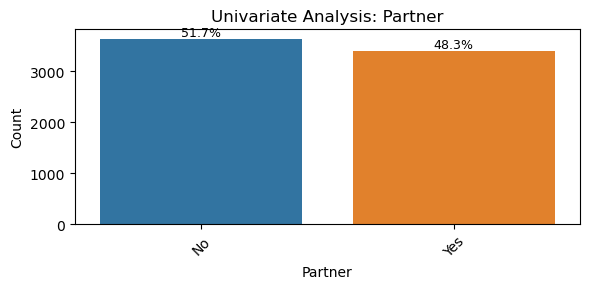

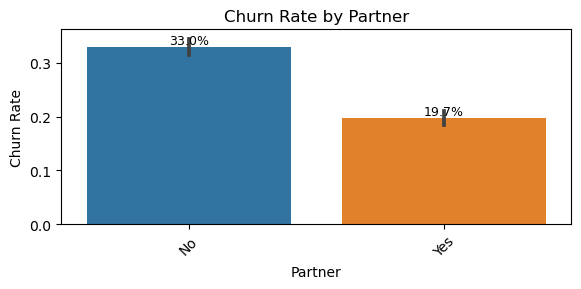

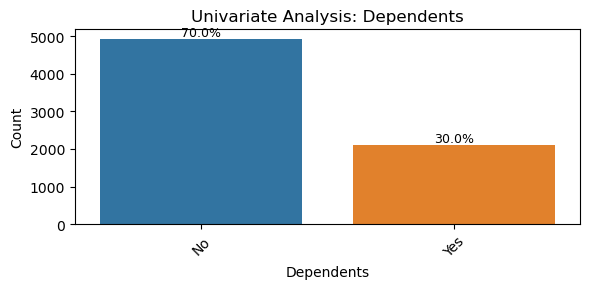

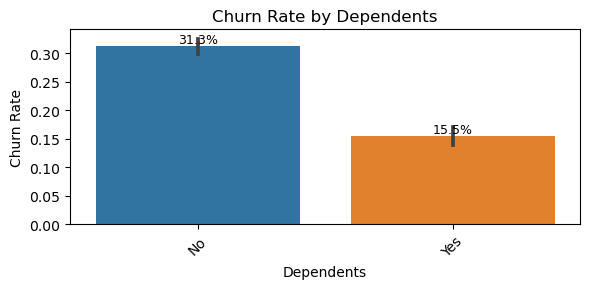

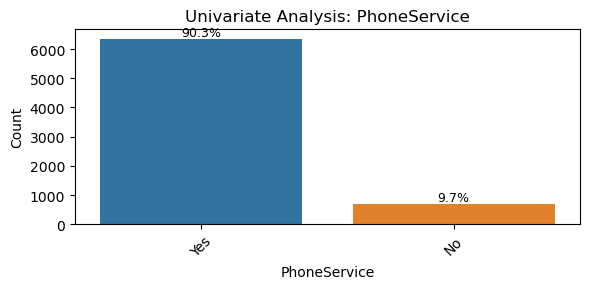

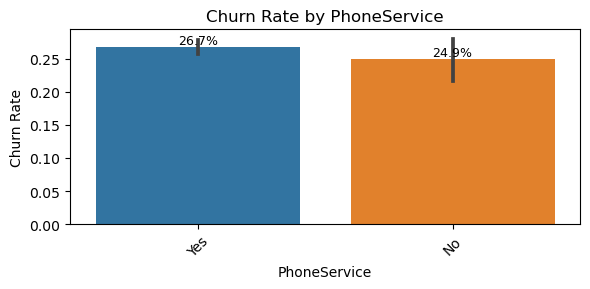

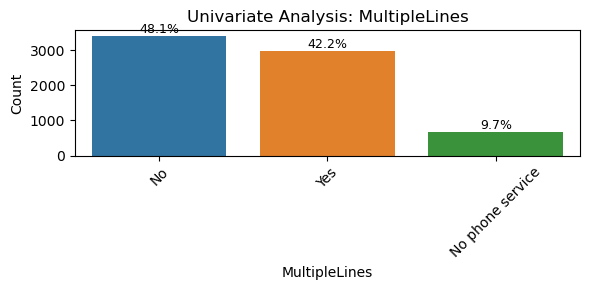

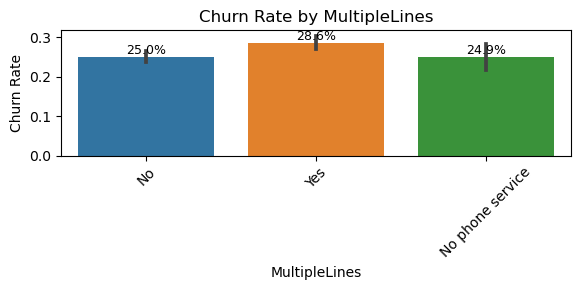

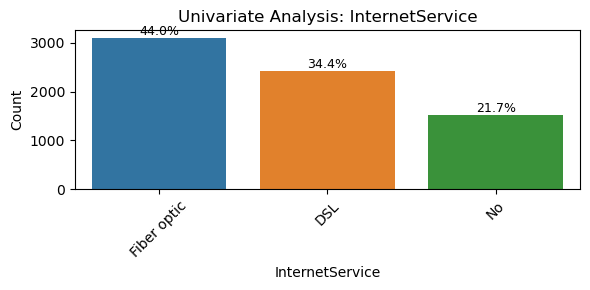

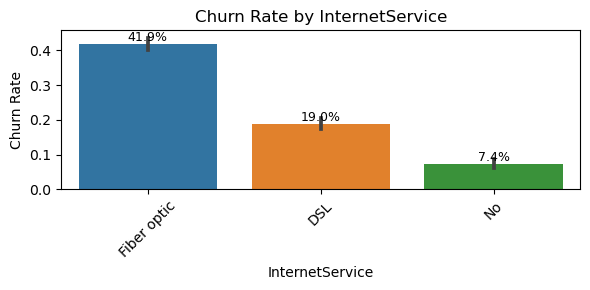

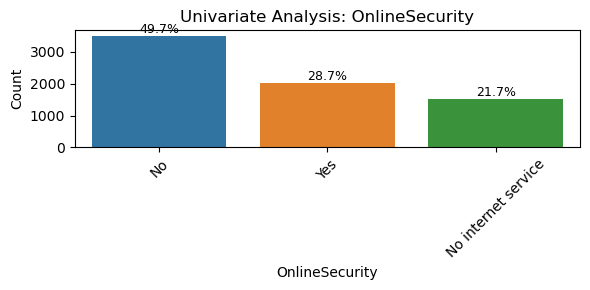

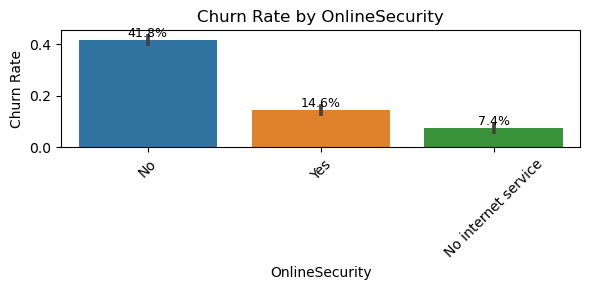

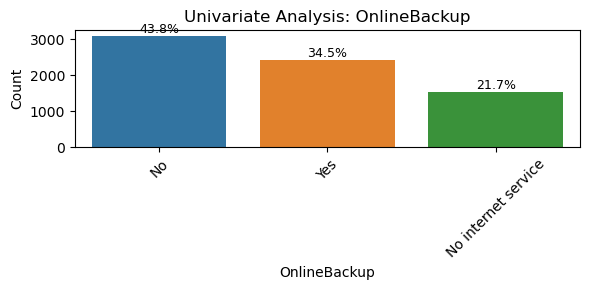

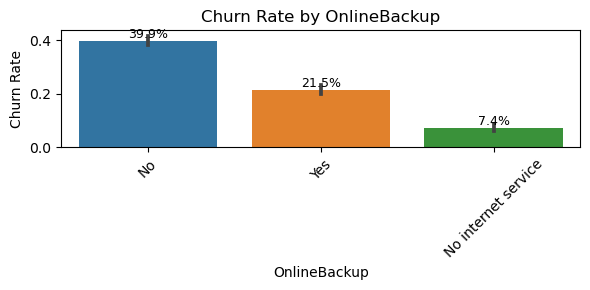

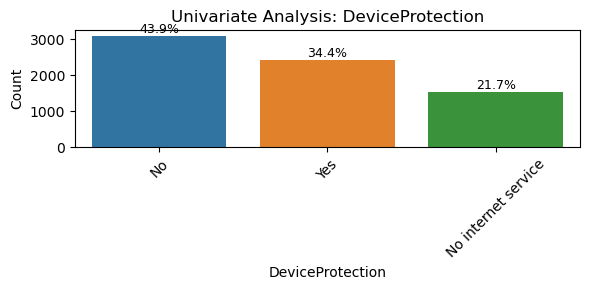

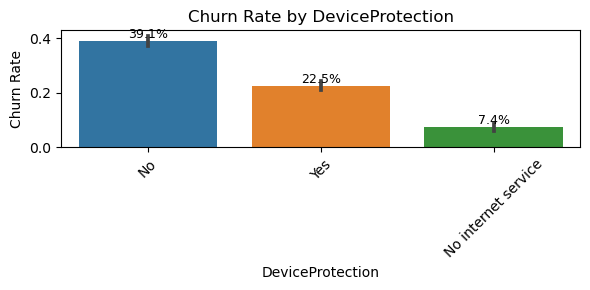

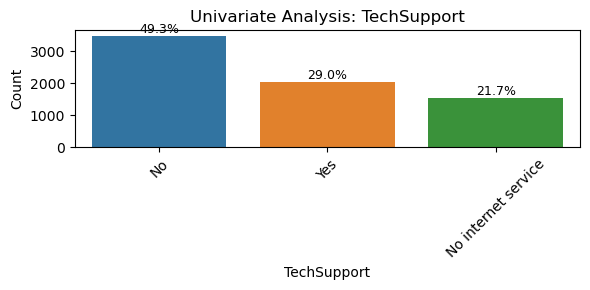

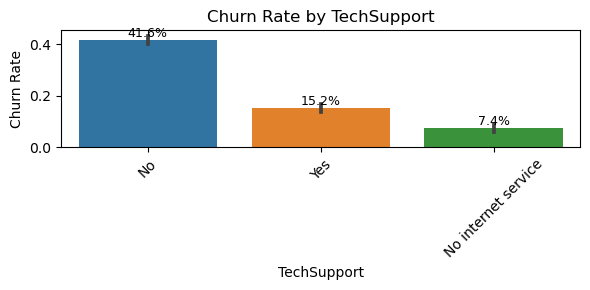

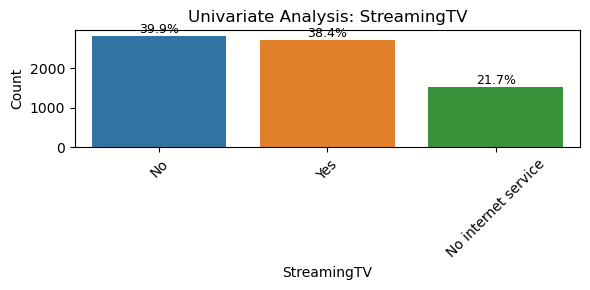

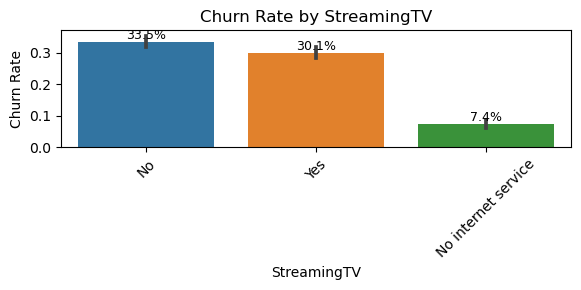

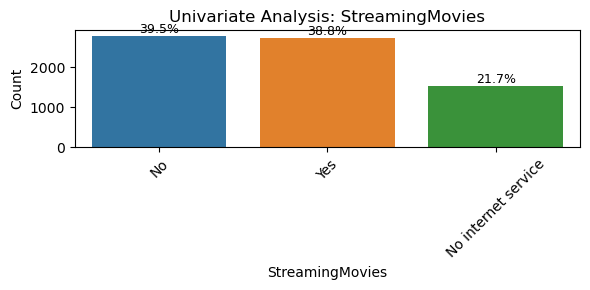

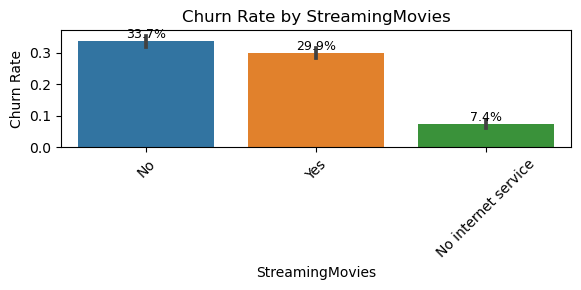

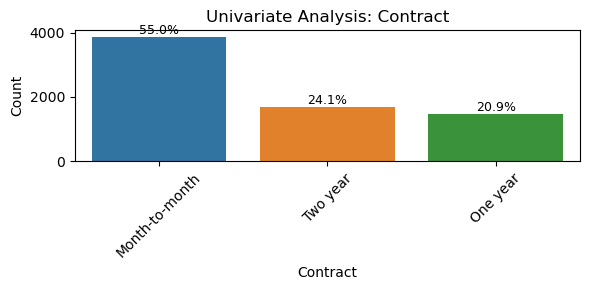

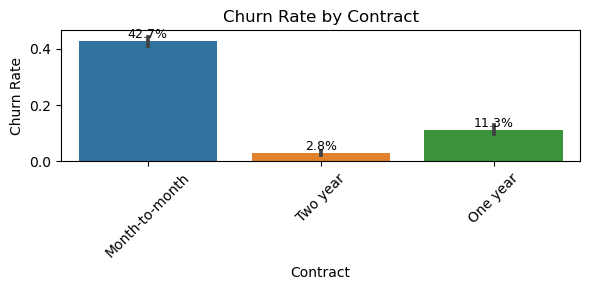

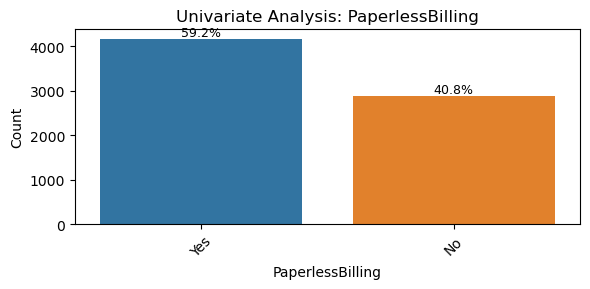

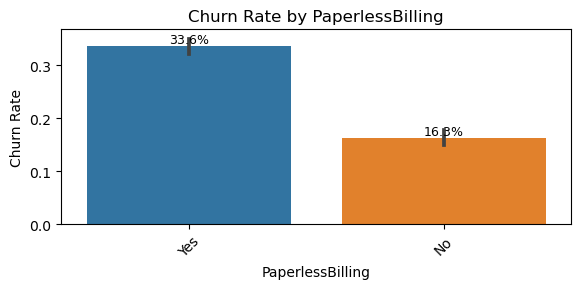

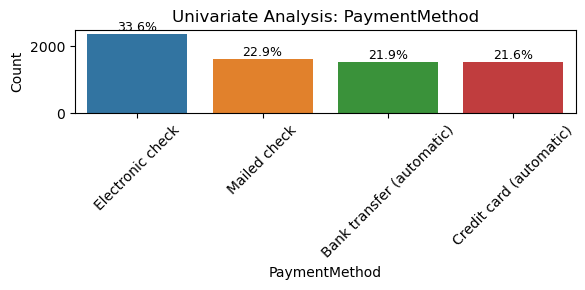

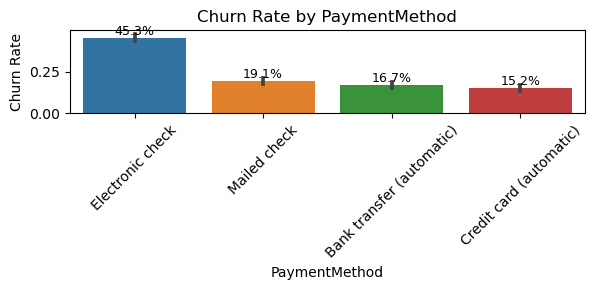

In [23]:
plot_uni_bi_categorical(df, Categorical_cols)

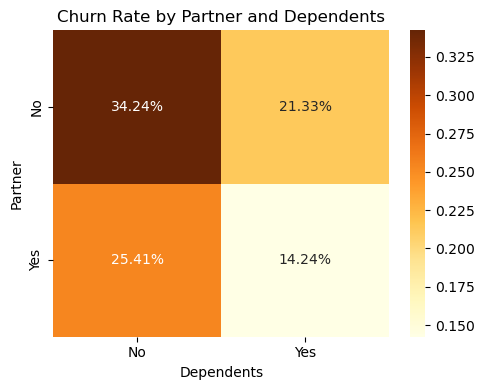

In [24]:
#Multivariate analysis of partner,dependant and churn 

df['Churn_encoded'] = df['Churn'].map({'Yes': 1, 'No': 0})

grouped = df.groupby(['Partner', 'Dependents'])['Churn_encoded'].mean().reset_index()
pivot = grouped.pivot(index='Partner', columns='Dependents', values='Churn_encoded')

plt.figure(figsize=(5, 4))
sns.heatmap(pivot, annot=True, fmt=".2%", cmap="YlOrBr")
plt.title("Churn Rate by Partner and Dependents")
plt.ylabel("Partner")
plt.xlabel("Dependents")
plt.tight_layout()
plt.show()


## 📊 Categorical Feature EDA – Interpretation

# 1. InternetService

Distribution:
Fiber optic (44.0%)
DSL (34.4%)
No internet (21.7%)

Insight:
Fiber optic is the most common service, but it's also strongly associated with higher churn (seen in other churn-related graphs you may have analyzed).


# 2. PhoneService & MultipleLines

PhoneService Distribution:
Yes: 90.3%
No: 9.7%

MultipleLines Distribution:
No: 48.1%
Yes: 42.2%
No phone service: 9.7%

Churn Rate by MultipleLines:
Yes: 28.6%
No: 25.0%
No phone service: 24.9%

Insight:
Having multiple lines is slightly associated with higher churn, though the effect is minor. Most customers have a phone service.


# 3. Partner
Distribution:

No: 51.7%
Yes: 48.3%

Churn Rate:
No: 33.0%
Yes: 19.7%

Insight:
Customers without a partner churn more, suggesting that personal stability may reduce churn.

# 4. Dependents
Distribution:
No: 70.0%
Yes: 30.0%

Insight:
Majority have no dependents. You didn’t include the churn rate for this, but often customers with dependents churn less, possibly due to service stability needs.


# 5. OnlineSecurity

Distribution:

No: 49.7%
Yes: 28.7%

No internet service: 21.7%

Churn Rate:
No: 41.8%
Yes: 14.6%

Insight:
Not having online security correlates strongly with higher churn. Offering or bundling this could be a retention strategy.

# 6. OnlineBackup

Distribution:
No: 43.8%
Yes: 34.5%
No internet: 21.7%

Insight:
Similar to OnlineSecurity — those without OnlineBackup tend to churn more.

# 7. DeviceProtection

Distribution:
No: 43.9%
Yes: 34.4%
No internet: 21.7%

Churn Rate:
No: 39.1%
Yes: 22.5%

Insight:
Device protection seems to help reduce churn, possibly due to added perceived value.

# 8. TechSupport
Distribution:
No: 49.3%
Yes: 29.0%
No internet: 21.7%

Churn Rate:
No: 41.6%
Yes: 15.2%

Insight:
Tech support is a key differentiator — customers with no support churn nearly 3x more. This is critical for service quality.

# 9. StreamingTV
Distribution:
No: 39.9%
Yes: 38.4%
No internet: 21.7%

Churn Rate:
No: 33.5%
Yes: 30.1%

Insight:
Small churn difference — but interestingly, those who don't use StreamingTV churn slightly more, suggesting content bundles might help retention.

# 10. StreamingMovies
Distribution:
Similar to StreamingTV.

Churn Rate:
No: 33.7%
Yes: 29.9%

Insight:
Slightly lower churn for customers with streaming, but not a strong predictor.

# 11. Contract
Distribution:
Month-to-month: 55.0%
Two year: 24.1%
One year: 20.9%

Churn Rate:
Month-to-month: 42.7%
One year: 11.3%
Two year: 2.8%

Insight:
Longer contracts dramatically reduce churn. This is one of the strongest churn predictors in the dataset.

# 12. PaperlessBilling

Distribution:
Yes: 59.2%
No: 40.8%

Churn Rate:
Yes: 33.6%
No: 16.8%

Insight:
Paperless billing users churn more, possibly because it's correlated with month-to-month or electronic check usage.

# 13. PaymentMethod

Distribution:
Electronic check: 33.6%
Mailed check: 22.9%
Bank transfer (auto): 21.9%
Credit card (auto): 21.6%

Churn Rate:
Electronic check: 45.3%
Mailed check: 19.1%
Bank transfer (auto): 16.7%
Credit card (auto): 15.2%

Insight:
Electronic check users churn the most, while automatic payments are linked to the lowest churn — another key retention lever.

## Exploratory Data Analysis -- Numerical features 

In [25]:
## numerical data eda 

numerical_cols = df.select_dtypes(include= 'number').columns.tolist()
numerical_cols= [col for col in numerical_cols if col != 'Churn_encoded']

df[numerical_cols].describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2279.734304
std,24.559481,30.090047,2266.794470
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,398.550000
50%,29.000000,70.350000,1394.550000
75%,55.000000,89.850000,3786.600000
max,72.000000,118.750000,8684.800000


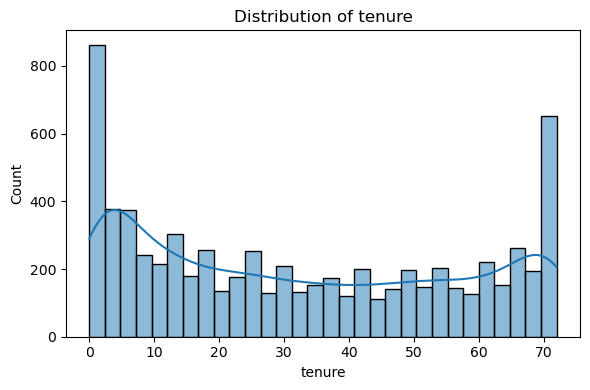

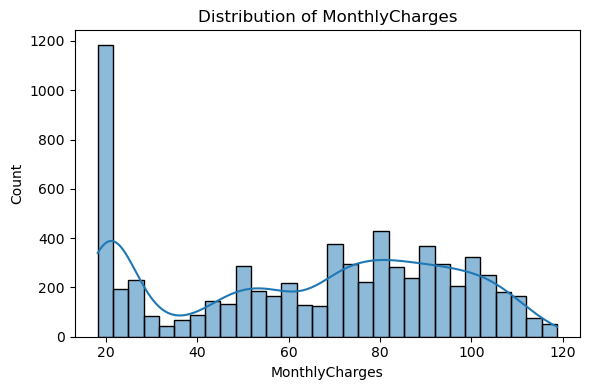

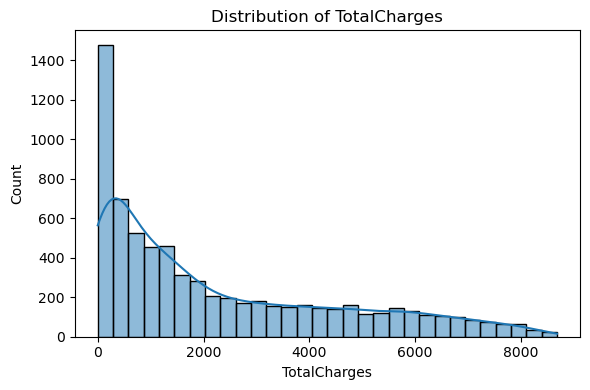

In [26]:


for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True, bins=30)  # <-- fixed here
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()


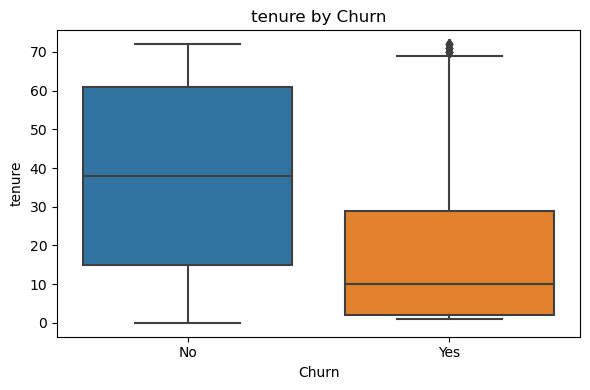

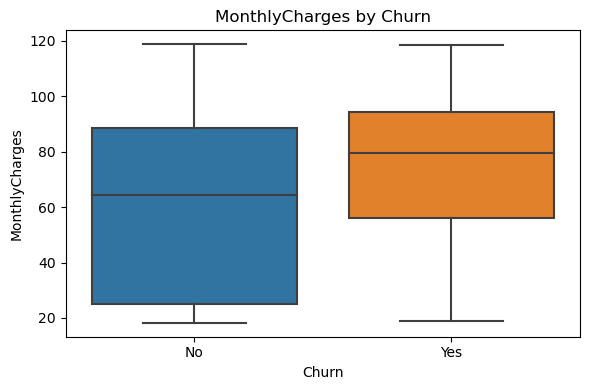

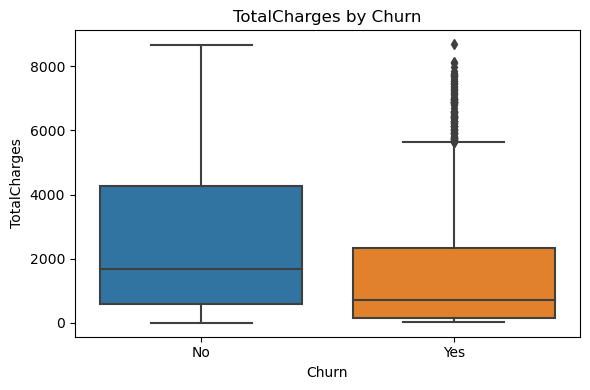

In [27]:
for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='Churn', y=col, data=df)
    plt.title(f'{col} by Churn')
    plt.tight_layout()
    plt.show()


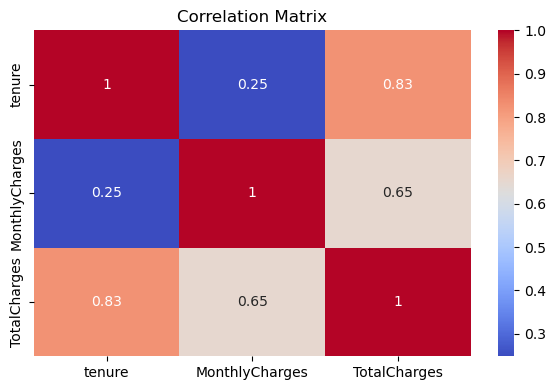

In [28]:
plt.figure(figsize=(6, 4))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()


##  Numerical Feature Analysis 

 # 1. Correlation Matrix

tenure and TotalCharges have a strong positive correlation (0.83). This makes sense: the longer a customer stays, the more total charges they accumulate.

MonthlyCharges has moderate correlation with TotalCharges (0.65) but low correlation with tenure (0.25), indicating charges aren't always higher over time.

Insight: tenure and TotalCharges carry similar long-term customer value information.


# 2. Boxplots – Numeric Features by Churn

a. tenure vs. Churn

Customers who churned generally have much lower tenure.

Median tenure for churners is around 10 months, compared to ~40 months for retained customers.

Insight: Newer customers are more likely to churn.


b. MonthlyCharges vs. Churn

Customers who churned have higher monthly charges on average.
The interquartile range is slightly shifted upward for churners.

Insight: Higher monthly bills may contribute to dissatisfaction and churn.


c. TotalCharges vs. Churn

Churned customers tend to have lower total charges, which aligns with their shorter tenure.
The distribution is right-skewed, with some outliers.
Insight: Early churners haven’t accumulated large bills.



# 3. Distribution Plots – Overall Numeric Spread

a. Distribution of tenure

Bimodal: Peaks at 0–5 months and 70+ months.
Suggests two types of customers: short-term trial users and long-term loyal ones.
Insight: Retention efforts may be critical in the first few months.

b. Distribution of MonthlyCharges

Spread fairly evenly between $20–$120, with a spike around $20, likely for low-tier services.
The distribution is slightly right-skewed.
Insight: Wide range of pricing — possibly tied to bundled services.

c. Distribution of TotalCharges

Strongly right-skewed.
Many customers have low total charges, indicating short tenure.

Insight: New users dominate the dataset or churn early.

In [29]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Churn_encoded
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1


## Feature Engineering

In [30]:
#df = df.drop('customerID', axis=1)

In [31]:
df= df.drop('Churn_encoded',axis=1 )


In [32]:
df['Churn'] = df['Churn'].map({'No': 0, 'Yes': 1})

# Train Test Split and Encoding 

In [33]:
X= df.drop("Churn",axis=1)
y = df['Churn']

In [34]:

X= X.drop('customerID',axis=1 )
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   object 
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [35]:
# Train test split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size= 0.2, stratify= y, random_state= 42 )

In [36]:
Categorical_col1 = X.select_dtypes(include="object").columns.tolist()
numerical_col1 = X.select_dtypes(include=["int64",'float64']).columns.tolist()

In [37]:
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer

#OneHotEncoder

preprocessor = ColumnTransformer(
    transformers= [
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore',sparse_output=False), Categorical_col1),
        ('num',StandardScaler(), numerical_col1)
    ],
    remainder= "passthrough"
    
)

In [38]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.pipeline import Pipeline

from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    confusion_matrix,
    classification_report,
    roc_curve,
    auc
)

In [40]:
# Model dictionary
models = {
    "Logistic Regression": LogisticRegression(max_iter=5000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Support Vector Machine": SVC(probability=True),
    "Naive Bayes": GaussianNB(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "LightGBM": LGBMClassifier(verbosity=-1)
}

In [41]:
import time

trained_models = {}
for name, model in models.items():
    print(f"Training {name}...")
    start = time.time()

    pipeline = Pipeline([
        ("preprocessing", preprocessor),
        ("classifier", model)
    ])
    
    pipeline.fit(X_train, y_train)
    trained_models[name] = pipeline

    end = time.time()
    print(f"✅ Done training {name} in {end - start:.2f} seconds\n")


Training Logistic Regression...


✅ Done training Logistic Regression in 0.23 seconds

Training Decision Tree...
✅ Done training Decision Tree in 0.12 seconds

Training Random Forest...
✅ Done training Random Forest in 0.99 seconds

Training AdaBoost...
✅ Done training AdaBoost in 0.89 seconds

Training Gradient Boosting...
✅ Done training Gradient Boosting in 1.34 seconds

Training Support Vector Machine...
✅ Done training Support Vector Machine in 9.48 seconds

Training Naive Bayes...
✅ Done training Naive Bayes in 0.07 seconds

Training K-Nearest Neighbors...
✅ Done training K-Nearest Neighbors in 0.06 seconds

Training XGBoost...


/Users/ravin/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [18:52:06] WARNING: /var/folders/c_/qfmhj66j0tn016nkx_th4hxm0000gp/T/abs_b6qk1lz_ug/croot/xgboost-split_1724073748391/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


✅ Done training XGBoost in 0.23 seconds

Training LightGBM...
✅ Done training LightGBM in 0.25 seconds



In [42]:
# To save the model if needed 

import joblib
for name, model in trained_models.items():
    filename = f"{name.replace(' ', '_')}_model.pkl"
    joblib.dump(model, filename)
    print(f"✅ Saved: {filename}") 
    

✅ Saved: Logistic_Regression_model.pkl
✅ Saved: Decision_Tree_model.pkl
✅ Saved: Random_Forest_model.pkl
✅ Saved: AdaBoost_model.pkl
✅ Saved: Gradient_Boosting_model.pkl


✅ Saved: Support_Vector_Machine_model.pkl
✅ Saved: Naive_Bayes_model.pkl
✅ Saved: K-Nearest_Neighbors_model.pkl
✅ Saved: XGBoost_model.pkl
✅ Saved: LightGBM_model.pkl


In [43]:
results = []

for name, model in trained_models.items():
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model.named_steps["classifier"], "predict_proba") else None

    results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1-Score": f1_score(y_test, y_pred),
        "ROC AUC": roc_auc_score(y_test, y_proba) if y_proba is not None else "N/A"
    })

    print(f"= {name}")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print("-" * 100)






= Logistic Regression
[[927 108]
 [165 209]]
              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1035
           1       0.66      0.56      0.60       374

    accuracy                           0.81      1409
   macro avg       0.75      0.73      0.74      1409
weighted avg       0.80      0.81      0.80      1409

----------------------------------------------------------------------------------------------------


= Decision Tree
[[862 173]
 [190 184]]
              precision    recall  f1-score   support

           0       0.82      0.83      0.83      1035
           1       0.52      0.49      0.50       374

    accuracy                           0.74      1409
   macro avg       0.67      0.66      0.66      1409
weighted avg       0.74      0.74      0.74      1409

----------------------------------------------------------------------------------------------------
= Random Forest
[[932 103]
 [193 181]]
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1035
           1       0.64      0.48      0.55       374

    accuracy                           0.79      1409
   macro avg       0.73      0.69      0.71      1409
weighted avg       0.78      0.79      0.78      1409

----------------------------------------------------------------------------------------------------
= AdaBoost
[[919 116]
 [167 207]]
              precision    recal

In [44]:
# generate "table" of evaluation 

results_df = pd.DataFrame(results).sort_values(by="F1-Score", ascending=False)
results_df.reset_index(drop=True, inplace=True)

results_df

,Model,Accuracy,Precision,Recall,F1-Score,ROC AUC
0,Logistic Regression,0.806246,0.659306,0.558824,0.604920,0.842181
1,AdaBoost,0.799148,0.640867,0.553476,0.593974,0.844475
2,Naive Bayes,0.655784,0.426877,0.866310,0.571933,0.809236
3,Gradient Boosting,0.797729,0.653979,0.505348,0.570136,0.841515
4,LightGBM,0.790632,0.627010,0.521390,0.569343,0.835816
5,XGBoost,0.779986,0.597561,0.524064,0.558405,0.827153
6,Support Vector Machine,0.794890,0.654545,0.481283,0.554700,0.794770
7,K-Nearest Neighbors,0.762952,0.553763,0.550802,0.552279,0.791360
8,Random Forest,0.789922,0.637324,0.483957,0.550152,0.823314
9,Decision Tree,0.742370,0.515406,0.491979,0.503420,0.661924


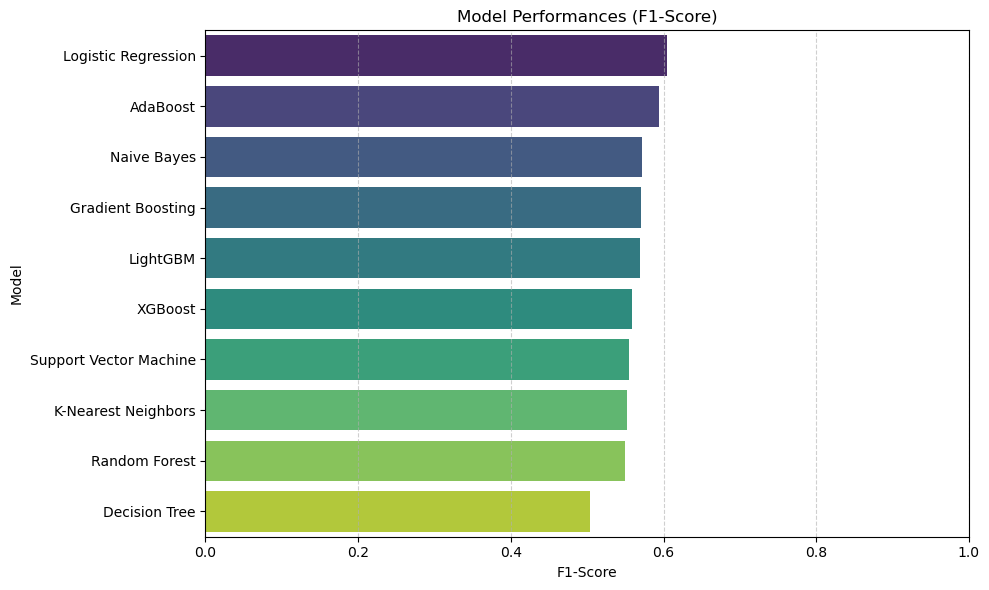

In [45]:
# Generate a graph of the model evaluation result 

sorted_df = results_df.sort_values(by="F1-Score", ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=sorted_df, x="F1-Score", y="Model", palette="viridis")

plt.title("Model Performances (F1-Score)")
plt.xlabel("F1-Score")
plt.ylabel("Model")
plt.xlim(0, 1)
plt.grid(axis="x", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

## Best Model is Logistic Regression

## Hyperparameter Tuning 

In [46]:
from sklearn.model_selection import GridSearchCV

logistic_pipeline = Pipeline([
    ("preprocessing", preprocessor),
    ("classifier", LogisticRegression(max_iter=5000))
])

In [47]:
param_grid = {
    'classifier__C': [0.01, 0.1, 1, 10, 100],
    'classifier__penalty': ['l2'],  
    'classifier__solver': ['lbfgs', 'liblinear'],
    'classifier__max_iter': [100, 500, 1000]
}


In [48]:
grid_search = GridSearchCV(
    estimator=logistic_pipeline,
    param_grid=param_grid,
    cv=5,
    scoring='f1',  
    n_jobs=-1,
    verbose=2
)

grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_

joblib.dump(best_model, "logistic_regression_churn_model_hypertuned.pkl")
print(" Model saved as 'logistic_regression_churn_model.pkl'")


Fitting 5 folds for each of 30 candidates, totalling 150 fits


[CV] END classifier__C=0.01, classifier__max_iter=100, classifier__penalty=l2, classifier__solver=lbfgs; total time=   0.1s
[CV] END classifier__C=0.01, classifier__max_iter=100, classifier__penalty=l2, classifier__solver=lbfgs; total time=   0.1s
[CV] END classifier__C=0.01, classifier__max_iter=100, classifier__penalty=l2, classifier__solver=lbfgs; total time=   0.2s
[CV] END classifier__C=0.01, classifier__max_iter=100, classifier__penalty=l2, classifier__solver=lbfgs; total time=   0.2s
[CV] END classifier__C=0.01, classifier__max_iter=100, classifier__penalty=l2, classifier__solver=lbfgs; total time=   0.2s
[CV] END classifier__C=0.01, classifier__max_iter=100, classifier__penalty=l2, classifier__solver=liblinear; total time=   0.1s
[CV] END classifier__C=0.01, classifier__max_iter=100, classifier__penalty=l2, classifier__solver=liblinear; total time=   0.2s
[CV] END classifier__C=0.01, classifier__max_iter=100, classifier__penalty=l2, classifier__solver=liblinear; total time=   0

/Users/ravin/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/ravin/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

[CV] END classifier__C=10, classifier__max_iter=100, classifier__penalty=l2, classifier__solver=liblinear; total time=   0.2s
[CV] END classifier__C=10, classifier__max_iter=100, classifier__penalty=l2, classifier__solver=lbfgs; total time=   0.2s
[CV] END classifier__C=10, classifier__max_iter=100, classifier__penalty=l2, classifier__solver=liblinear; total time=   0.2s
[CV] END classifier__C=10, classifier__max_iter=100, classifier__penalty=l2, classifier__solver=liblinear; total time=   0.2s
[CV] END classifier__C=10, classifier__max_iter=100, classifier__penalty=l2, classifier__solver=liblinear; total time=   0.2s
[CV] END classifier__C=10, classifier__max_iter=100, classifier__penalty=l2, classifier__solver=liblinear; total time=   0.2s
[CV] END classifier__C=10, classifier__max_iter=500, classifier__penalty=l2, classifier__solver=lbfgs; total time=   0.2s
[CV] END classifier__C=10, classifier__max_iter=500, classifier__penalty=l2, classifier__solver=lbfgs; total time=   0.2s
[CV]

In [49]:
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)

best_logistic_model = grid_search.best_estimator_


Best Parameters: {'classifier__C': 100, 'classifier__max_iter': 100, 'classifier__penalty': 'l2', 'classifier__solver': 'lbfgs'}
Best Cross-Validation Score: 0.599883958044293


Confusion Matrix:
 [[924 111]
 [168 206]]

 Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.89      0.87      1035
           1       0.65      0.55      0.60       374

    accuracy                           0.80      1409
   macro avg       0.75      0.72      0.73      1409
weighted avg       0.79      0.80      0.80      1409



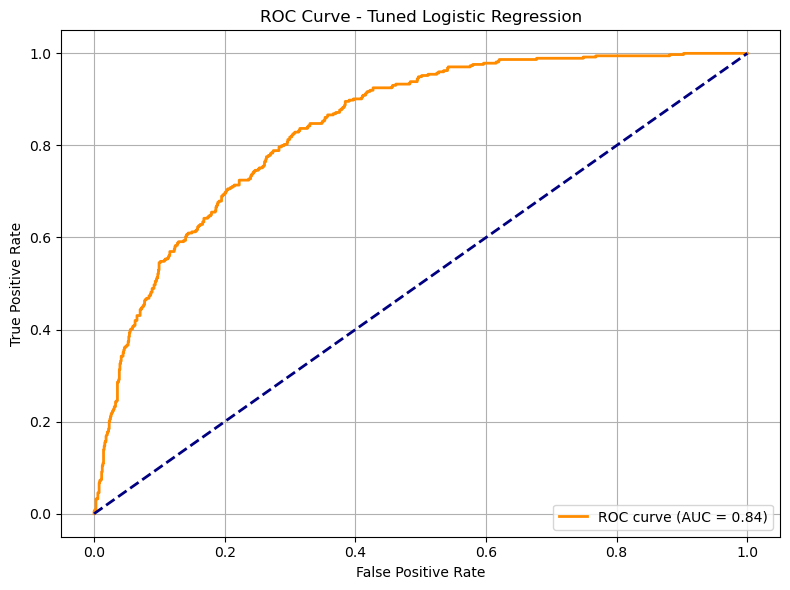

In [50]:
# Evaluation of the hypertuned logistical model

from sklearn.metrics import roc_curve, auc
# Predict
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)[:, 1]

# Confusion Matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
# Classification Report
print("\n Classification Report:\n", classification_report(y_test, y_pred))

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Tuned Logistic Regression")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

In [51]:
# Classifier within the best model
logreg = best_model.named_steps["classifier"]

# Get all column names from preprocessing
feature_names = best_model.named_steps["preprocessing"].get_feature_names_out()

# Get coefficients
coefficients = logreg.coef_[0]

# Export to DataFrame
importance_df = pd.DataFrame({
    "Feature": feature_names,
    "Coefficient": coefficients,
    "Abs_Coeff": np.abs(coefficients)
}).sort_values(by="Abs_Coeff", ascending=False)

importance_df.drop("Abs_Coeff", axis=1).head(15)  # Show the 15 most important features

,Feature,Coefficient
7,cat__InternetService_Fiber optic,2.828771
28,num__MonthlyCharges,-2.458127
5,cat__MultipleLines_No phone service,-1.828566
22,cat__Contract_Two year,-1.373955
27,num__tenure,-1.306362
20,cat__StreamingMovies_Yes,1.032117
18,cat__StreamingTV_Yes,1.030840
4,cat__PhoneService_Yes,-0.776734
21,cat__Contract_One year,-0.698372
6,cat__MultipleLines_Yes,0.691271


##  Final Conclusion

This project investigated the drivers of customer churn in the telecom industry using the Telco Customer Churn dataset. After comprehensive data cleaning, feature engineering, and model evaluation, we identified key behavioral patterns and built a robust logistic regression model to predict churn.

---

###  Key EDA Insights

- Customers with **month-to-month contracts** have the highest churn rate (42.7%), while churn is lowest for those with two-year contracts (2.8%).
- Lack of **tech support**, **online security**, or **device protection** correlates strongly with higher churn.
- Customers using **electronic checks** churn at much higher rates (45%) compared to those using auto-pay options.
- **New users (low tenure)** and those with **high monthly charges** are significantly more likely to churn.
- The churn distribution across services like **StreamingTV** and **StreamingMovies** suggests bundled services might slightly reduce churn.

---

###  Model Summary

Multiple models were trained and compared using F1-score and ROC AUC. The best-performing model was:

**Tuned Logistic Regression**

| Metric         | Value     |
|----------------|-----------|
| Accuracy       | 0.80      |
| F1-Score       | 0.60      |
| Precision      | 0.66      |
| Recall         | 0.55      |
| ROC AUC Score  | **0.84**  |
| Best Params    | `C=100`, `penalty=l2`, `solver=lbfgs`, `max_iter=100` |

The model achieved strong precision and ROC AUC, and a balanced F1-score. It performs well overall, though recall could be improved further for churners.

---

###  Top Predictive Features (Logistic Regression Coefficients)

| Feature                                | Coefficient | Effect |
|----------------------------------------|-------------|--------|
| `InternetService_Fiber optic`          | +2.83       |  Increases churn risk |
| `MonthlyCharges`                       | –2.46       |  Reduces churn risk (surprising; might reflect bundling or auto-pay behavior) |
| `MultipleLines_No phone service`       | –1.83       |  Strongly reduces churn |
| `Contract_Two year`                    | –1.37       |  Strongly reduces churn |
| `tenure`                               | –1.31       |  Longer tenure = lower churn |
| `StreamingTV_Yes` / `StreamingMovies_Yes` | +1.03 each |  Slightly increases churn (could reflect less satisfied entertainment users) |

The model confirms that **contract type**, **tenure**, and **internet service type** are key churn drivers. Customers with **fiber optic internet**, **streaming services**, or **month-to-month contracts** are at higher risk of churn, while those with long tenure and multi-year contracts are more stable.

---

###  Business Implications

- Offer discounts or incentives to move **month-to-month users** into **1–2 year contracts**
- Bundle **tech support**, **device protection**, and **security** services to retain users
- Monitor **fiber optic users** more closely — they're churning despite being the most common service
- Target **new customers** (low tenure) early with loyalty programs or personalized offers
- Encourage **auto-payment options** to replace electronic checks, which are churn-prone

---

###  Next Steps

-  Add SHAP for model explainability at the individual prediction level
-  Deploy model as a Streamlit or Gradio app for customer success teams
-  Monitor model drift and retrain periodically on live customer data

---


